In [3]:
# import pandas
import pandas as pd

#Set cols to view 50
pd.set_option('display.max_columns', 50)

#Import data
data = pd.read_csv("shelter-animal-outcomes/train.csv.gz")

#Look at data
#print(data.head(10))
#data.describe()

#Cleaning
## Create name_null variable: is name missing 
data.loc[data['Name'].isnull(), 'Name_Null'] = 1
data['Name_Null'].fillna(0, inplace=True)

#Drop NAs
data = data.drop(['OutcomeSubtype', 'Name'],axis=1).dropna()

#Code Age
data['AgeNumeric']=data['AgeuponOutcome'].str.split(" ", n = 1, expand = True)[0].astype('float')
data['AgeString']=data['AgeuponOutcome'].str.split(" ", n = 1, expand = True)[1]
data.loc[data['AgeString'].str[0]=='y' , 'AgeInDays'] = data['AgeNumeric']*365.25
data.loc[data['AgeString'].str[0]=='w' , 'AgeInDays'] = data['AgeNumeric']*7
data.loc[data['AgeString'].str[0]=='m' , 'AgeInDays'] = data['AgeNumeric']*(365.25/12)
data.loc[data['AgeString'].str[0]=='d' , 'AgeInDays'] = data['AgeNumeric']


# Code state and sex 
data["Intact"] = data["SexuponOutcome"].str.split(" ", n = 1, expand = True)[0] 
data["Sex"]= data["SexuponOutcome"].str.split(" ", n = 1, expand = True)[1]

#Date time stuff
data['date_year'] = data['DateTime'].str[0:4]
data['date_month'] = data['DateTime'].str[5:7]
data['date_day'] = data['DateTime'].str[8:10]

data['date_year'] = data['date_year'].astype('int64')
data['date_month'] = data['date_month'].astype('int64')
data['date_day'] = data['date_day'].astype('int64')

#Color

#Get top 10 colors
data["Color"] = data["Color"].str.replace('/',
                                          ' ')
color_freq = data["Color"].str.split(expand=True).stack().value_counts()[:10]
##print(color_freq)

#Create top 10 color cols
for i in range(0 , color_freq.count()):
    data.loc[data["Color"].str.find(color_freq.index[i])>-1,color_freq.index[i]] = 1
    data[color_freq.index[i]].fillna(0, inplace=True)

#Breed    
#Get top 10 breed combine 4 of top words as they mainly occur together
data["Breed"] = data["Breed"].str.replace('/',
                                          ' ')
data["Breed"] = data["Breed"].str.replace('Domestic Shorthair',
                                          'DomesticShorthair')
data["Breed"] = data["Breed"].str.replace('Pit Bull',
                                          'PitBull')

breed_freq = data["Breed"].str.split(expand=True).stack().value_counts()[:10]
##print(breed_freq)

#Create top 10 breed cols
for i in range(0 , breed_freq.count()):
    data.loc[data["Breed"].str.find(breed_freq.index[i])>-1,breed_freq.index[i]] = 1
    data[breed_freq.index[i]].fillna(0, inplace=True)    

#Drop unnecessary vars
data = data.drop(['SexuponOutcome',
                  'AgeuponOutcome',
                  'AgeNumeric',
                  'AgeString',
                  'Color',
                  'DateTime',
                  'Breed'],
                  axis=1)

## convert id to index
data.set_index('AnimalID', inplace=True)

data.head()


,OutcomeType,AnimalType,Name_Null,AgeInDays,Intact,Sex,date_year,date_month,date_day,White,Black,Brown,Tabby,Tan,Blue,Orange,Brindle,Red,Tricolor,Mix,DomesticShorthair,Chihuahua,Retriever,Shorthair,PitBull,Labrador,Terrier,Domestic,Shepherd
AnimalID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A671945,Return_to_owner,Dog,0.0,365.25,Neutered,Male,2014,2,12,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A656520,Euthanasia,Cat,0.0,365.25,Spayed,Female,2013,10,13,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
A686464,Adoption,Dog,0.0,730.50,Neutered,Male,2015,1,31,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
A683430,Transfer,Cat,1.0,21.00,Intact,Male,2014,7,11,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
A667013,Transfer,Dog,1.0,730.50,Neutered,Male,2013,11,15,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data_onehot = data.copy()
data_onehot = pd.get_dummies(data_onehot, columns=['AnimalType','Intact','Sex'], prefix = ['AnimalType_','Intact_','Sex_'],drop_first=True)
data_onehot.head()

,OutcomeType,Name_Null,AgeInDays,date_year,date_month,date_day,White,Black,Brown,Tabby,Tan,Blue,Orange,Brindle,Red,Tricolor,Mix,DomesticShorthair,Chihuahua,Retriever,Shorthair,PitBull,Labrador,Terrier,Domestic,Shepherd,AnimalType__Dog,Intact__Neutered,Intact__Spayed,Intact__Unknown,Sex__Male
AnimalID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A671945,Return_to_owner,0.0,365.25,2014,2,12,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1
A656520,Euthanasia,0.0,365.25,2013,10,13,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,1,0,0
A686464,Adoption,0.0,730.50,2015,1,31,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0,0,1
A683430,Transfer,1.0,21.00,2014,7,11,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,1
A667013,Transfer,1.0,730.50,2013,11,15,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1


In [5]:
#Fit Random Forest
from sklearn.model_selection import train_test_split

X=data_onehot.drop(['OutcomeType'],axis=1)
y=data_onehot['OutcomeType']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [6]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred_tr=clf.predict(X_train)


In [7]:
from sklearn import metrics
print('Training set  accuracy = ', metrics.accuracy_score(y_train, y_pred_tr))
print('Test set accuracy = ', metrics.accuracy_score(y_test, y_pred))


Training set  accuracy =  0.9977536503182328
Test set accuracy =  0.6289779108947959


In [8]:
feat_imp = pd.DataFrame({'importance':clf.feature_importances_})
feat_imp['feature'] = X_train.columns
feat_imp = feat_imp.sort_values('importance', ascending=True)
feat_imp.set_index('feature', inplace=True)

feat_imp

,importance
feature,
Orange,0.003939
Intact__Unknown,0.005186
Chihuahua,0.005732
Labrador,0.005842
Tricolor,0.006038
Retriever,0.006134
Tabby,0.006427
Brindle,0.007297
DomesticShorthair,0.007493


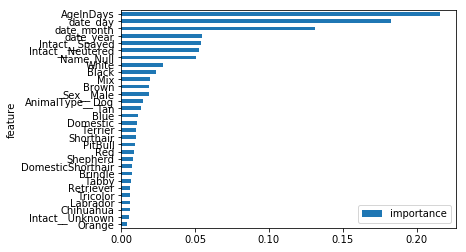

In [9]:
%matplotlib inline
feat_imp.plot.barh()

In [10]:
# Confusion matrix
pd.crosstab(y_test, y_pred)

col_0,Adoption,Died,Euthanasia,Return_to_owner,Transfer
OutcomeType,,,,,
Adoption,2572,0,20,427,276
Died,4,4,4,3,54
Euthanasia,70,1,59,94,239
Return_to_owner,585,0,23,598,204
Transfer,657,4,47,261,1807


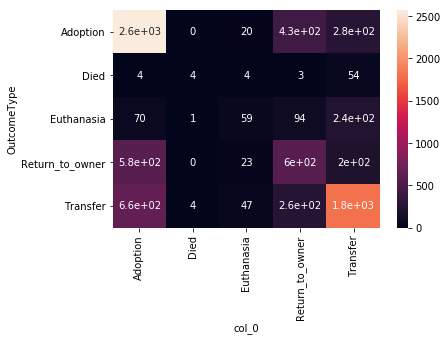

In [11]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
sn.heatmap(pd.crosstab(y_test, y_pred), annot=True)

In [14]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [18]:
from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.6min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [19]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [26]:
optimised_random_forest = rf_random.best_estimator_



y_pred_opt=optimised_random_forest.predict(X_test)
y_pred_tr_opt=optimised_random_forest.predict(X_train)

from sklearn import metrics
print('Training set  accuracy = ', metrics.accuracy_score(y_train, y_pred_tr_opt))
print('Test set accuracy = ', metrics.accuracy_score(y_test, y_pred_opt))



NameError: name 'AnimalType_Dog' is not defined

In [30]:
optimised_random_forest.predict_proba(X_test)

array([[1.65978435e-02, 2.65878343e-02, 8.36747545e-02, 6.11861182e-03,
        8.67020956e-01],
       [3.83124347e-01, 4.69009007e-05, 3.11246098e-02, 4.49175915e-01,
        1.36528227e-01],
       [5.81685782e-01, 2.67379679e-05, 1.52962142e-02, 2.46950852e-01,
        1.56040414e-01],
       ...,
       [7.18212583e-03, 8.67979377e-03, 1.76326319e-01, 3.35588765e-03,
        8.04455873e-01],
       [3.50493065e-01, 4.27314386e-03, 5.30848207e-02, 4.55506072e-01,
        1.36642899e-01],
       [4.78451893e-01, 1.23456790e-04, 1.61157099e-02, 3.70048649e-01,
        1.35260290e-01]])

In [45]:
# import pandas
import pandas as pd

#Set cols to view 50
pd.set_option('display.max_columns', 50)

#Import data
data = pd.read_csv("shelter-animal-outcomes/test.csv.gz")

#Look at data
#print(data.head(10))
#data.describe()

#Cleaning
## Create name_null variable: is name missing 
data.loc[data['Name'].isnull(), 'Name_Null'] = 1
data['Name_Null'].fillna(0, inplace=True)

#Drop NAs
data = data.drop(['Name'],axis=1).dropna()

#Code Age
data['AgeNumeric']=data['AgeuponOutcome'].str.split(" ", n = 1, expand = True)[0].astype('float')
data['AgeString']=data['AgeuponOutcome'].str.split(" ", n = 1, expand = True)[1]
data.loc[data['AgeString'].str[0]=='y' , 'AgeInDays'] = data['AgeNumeric']*365.25
data.loc[data['AgeString'].str[0]=='w' , 'AgeInDays'] = data['AgeNumeric']*7
data.loc[data['AgeString'].str[0]=='m' , 'AgeInDays'] = data['AgeNumeric']*(365.25/12)
data.loc[data['AgeString'].str[0]=='d' , 'AgeInDays'] = data['AgeNumeric']


# Code state and sex 
data["Intact"] = data["SexuponOutcome"].str.split(" ", n = 1, expand = True)[0] 
data["Sex"]= data["SexuponOutcome"].str.split(" ", n = 1, expand = True)[1]

#Date time stuff
data['date_year'] = data['DateTime'].str[0:4]
data['date_month'] = data['DateTime'].str[5:7]
data['date_day'] = data['DateTime'].str[8:10]

data['date_year'] = data['date_year'].astype('int64')
data['date_month'] = data['date_month'].astype('int64')
data['date_day'] = data['date_day'].astype('int64')

#Color

#Get top 10 colors
data["Color"] = data["Color"].str.replace('/',
                                          ' ')
color_freq = data["Color"].str.split(expand=True).stack().value_counts()[:10]
##print(color_freq)

#Create top 10 color cols
for i in range(0 , color_freq.count()):
    data.loc[data["Color"].str.find(color_freq.index[i])>-1,color_freq.index[i]] = 1
    data[color_freq.index[i]].fillna(0, inplace=True)

#Breed    
#Get top 10 breed combine 4 of top words as they mainly occur together
data["Breed"] = data["Breed"].str.replace('/',
                                          ' ')
data["Breed"] = data["Breed"].str.replace('Domestic Shorthair',
                                          'DomesticShorthair')
data["Breed"] = data["Breed"].str.replace('Pit Bull',
                                          'PitBull')

breed_freq = data["Breed"].str.split(expand=True).stack().value_counts()[:10]
##print(breed_freq)

#Create top 10 breed cols
for i in range(0 , breed_freq.count()):
    data.loc[data["Breed"].str.find(breed_freq.index[i])>-1,breed_freq.index[i]] = 1
    data[breed_freq.index[i]].fillna(0, inplace=True)    

#Drop unnecessary vars
data = data.drop(['SexuponOutcome',
                  'AgeuponOutcome',
                  'AgeNumeric',
                  'AgeString',
                  'Color',
                  'DateTime',
                  'Breed'],
                  axis=1)

## convert id to index
data.set_index('ID', inplace=True)

data_onehot = data.copy()
data_onehot = pd.get_dummies(data_onehot, columns=['AnimalType','Intact','Sex'], prefix = ['AnimalType_','Intact_','Sex_'],drop_first=True)
data_onehot.head()

data.head()

,AnimalType,Name_Null,AgeInDays,Intact,Sex,date_year,date_month,date_day,White,Black,Brown,Tabby,Tan,Blue,Orange,Brindle,Red,Tricolor,Mix,DomesticShorthair,Chihuahua,Retriever,PitBull,Shorthair,Labrador,Terrier,Domestic,Shepherd
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Dog,0.0,304.375,Intact,Female,2015,10,12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Dog,0.0,730.500,Spayed,Female,2014,7,26,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Cat,0.0,365.250,Neutered,Male,2016,1,13,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,Dog,0.0,121.750,Intact,Male,2013,12,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Dog,0.0,730.500,Neutered,Male,2015,9,24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
y_pred_opt=optimised_random_forest.predict(data_onehot)

predictions = optimised_random_forest.predict_proba(data_onehot)
y_pred_opt.size


joined = pd.DataFrame(optimised_random_forest.predict_proba(data_onehot), columns=optimised_random_forest.classes_)
joined["id"] = data.index
joined.head()

joined.to_csv(r'submission.csv',index=False)

In [77]:
y_pred_opt

array(['Transfer', 'Adoption', 'Adoption', ..., 'Transfer',
       'Return_to_owner', 'Return_to_owner'], dtype=object)